In [80]:
# importing libraries
import numpy as np
import pandas as pd
import missingno
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

# for visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

In [81]:
# Readin the titanic dataset

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

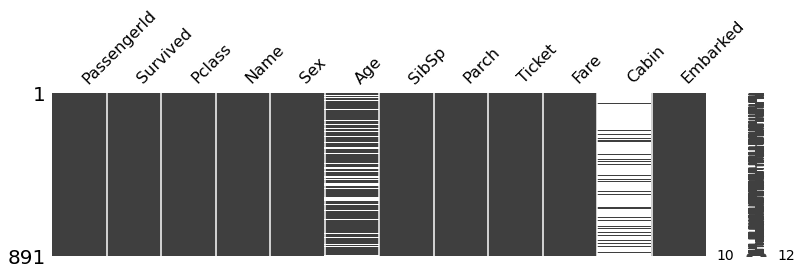

In [83]:
# Visualise missing data
missingno.matrix(df, figsize = (13,3))

In [84]:
# get the number of missing data points per column

missing_values_count = df.isnull().sum()

# percentage of missing values

missing_values_count / len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### Dealing with Missing Data

    1. Age can be imputed over by the median value
    2. Cabin values contain 77% missing data, therefore we can drop the entire column
    3. Embarked can be imputed over by using the mode of the column

In [85]:
# Imputing over Age

median_age = df.Age.median()
df.Age.fillna(median_age, inplace = True)

In [86]:
# Dropping Cabin column

df.drop('Cabin', axis = 1,inplace = True)

In [87]:
# Replacing Null values in Embark with the mode

df.Embarked = df.Embarked.fillna(df['Embarked'].mode()[0])

SibSp stands for sibling count

Parch stands for parent count

We can combine these 2 column into 1 distinct column to reflect family size

In [88]:
df['Family'] = df['SibSp'] + df['Parch']+1

#### Dropping irrelevant Data

We combined SibSp and Parch into 1 column called family. We may then drop these 2 columns as their data is stored in the new column.

Name does not impart any relevant meaning for our analysis as we are mainly concerned with the sex/gender of the person.

PaseengerID as well as Ticket number, I believe  doesnt depict any relevant meaning for our analysis.

In [89]:
df = df.drop(['Name','Ticket','SibSp','Parch', 'PassengerId'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [90]:
# Encoding Categorical Values 

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])

df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22.0,7.2500,2,2
1,1,1,0,38.0,71.2833,0,2
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,2
4,0,3,1,35.0,8.0500,2,1


#### Preparing X and y variables

In [91]:
X = df.loc[:,df.columns != 'Survived']
y = df.Survived

In [92]:
# Splitting data into training, development and testing
# 60% trained data, 25% development and 15% test

X_train, X_valid, X_test = np.split(X, [int(0.6*len(X)),int(0.85*len(X))])
y_train, y_valid, y_test = np.split(y, [int(0.6*len(X)),int(0.85*len(X))])

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(534, 6)
(223, 6)
(134, 6)


In [93]:
# training a model on the development set

trained = DecisionTreeClassifier(max_depth=None, random_state=42)
trained.fit(X_train, y_train)
print("Accuracy without a Specified Max Depth:", trained.score(X_valid, y_valid))
print("At depth:", trained.tree_.max_depth)

Accuracy without a Specified Max Depth: 0.7354260089686099
At depth: 19


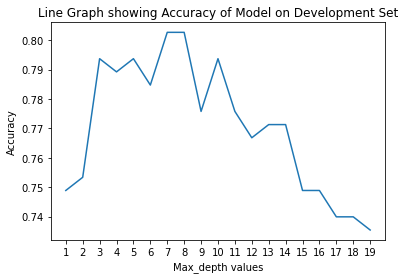

In [94]:
# Plotting the Effect on a line Graph  
no_depths = range(1,trained.tree_.max_depth+1)

no_depth_scores = [] 
for d in no_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=42)
  clf.fit(X_train, y_train)
  score = clf.score(X_valid, y_valid)
  no_depth_scores.append(score)

fig, ax = plt.subplots()
ax.plot(no_depths, no_depth_scores)
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(no_depths)
plt.title('Line Graph showing Accuracy of Model on Development Set')
plt.show()

### Implementing Depth Restrictions

In [95]:
# Testing Accuracy of Trained set and Development set at depth 2

trained = DecisionTreeClassifier(max_depth=2, random_state=42)
trained.fit(X_train, y_train)
print("Accuracy of Trained Set:", trained.score(X_train, y_train))
print('\n')
print("Accuracy of Development Set:", trained.score(X_valid, y_valid))
print("At depth:", trained.tree_.max_depth)

Accuracy of Trained Set: 0.8071161048689138


Accuracy of Development Set: 0.7533632286995515
At depth: 2


In [96]:
# Testing Accuracy of Trained set and Development set at depth 3

trained = DecisionTreeClassifier(max_depth=3, random_state=42)
trained.fit(X_train, y_train)
print("Accuracy of Trained Set:", trained.score(X_train, y_train))
print('\n')
print("Accuracy of Development Set:", trained.score(X_valid, y_valid))
print("At depth:", trained.tree_.max_depth)

Accuracy of Trained Set: 0.8314606741573034


Accuracy of Development Set: 0.7937219730941704
At depth: 3


In [97]:
# Testing Accuracy of Trained set and Development set at depth 4

trained = DecisionTreeClassifier(max_depth=4, random_state=42)
trained.fit(X_train, y_train)
print("Accuracy of Trained Set:", trained.score(X_train, y_train))
print('\n')
print("Accuracy of Development Set:", trained.score(X_valid, y_valid))
print("At depth:", trained.tree_.max_depth)

Accuracy of Trained Set: 0.8389513108614233


Accuracy of Development Set: 0.7892376681614349
At depth: 4


In [98]:
# Testing Accuracy of Trained set and Development set at depth 5

trained = DecisionTreeClassifier(max_depth=5, random_state=42)
trained.fit(X_train, y_train)
print("Accuracy of Trained Set:", trained.score(X_train, y_train))
print('\n')
print("Accuracy of Development Set:", trained.score(X_valid, y_valid))
print("At depth:", trained.tree_.max_depth)

Accuracy of Trained Set: 0.8651685393258427


Accuracy of Development Set: 0.7937219730941704
At depth: 5


In [99]:
# Testing Accuracy of Trained set and Development set at depth 6

trained = DecisionTreeClassifier(max_depth=6, random_state=42)
trained.fit(X_train, y_train)
print("Accuracy of Trained Set:", trained.score(X_train, y_train))
print('\n')
print("Accuracy of Development Set:", trained.score(X_valid, y_valid))
print("At depth:", trained.tree_.max_depth)

Accuracy of Trained Set: 0.8895131086142322


Accuracy of Development Set: 0.7847533632286996
At depth: 6


In [100]:
# Testing Accuracy of Trained set and Development set at depth 7

trained = DecisionTreeClassifier(max_depth=7, random_state=42)
trained.fit(X_train, y_train)
print("Accuracy of Trained Set:", trained.score(X_train, y_train))
print('\n')
print("Accuracy of Development Set:", trained.score(X_valid, y_valid))
print("At depth:", trained.tree_.max_depth)

Accuracy of Trained Set: 0.9119850187265918


Accuracy of Development Set: 0.8026905829596412
At depth: 7


In [101]:
# Testing Accuracy of Trained set and Development set at depth 8

trained = DecisionTreeClassifier(max_depth=8, random_state=42)
trained.fit(X_train, y_train)
print("Accuracy of Trained Set:", trained.score(X_train, y_train))
print('\n')
print("Accuracy of Development Set:", trained.score(X_valid, y_valid))
print("At depth:", trained.tree_.max_depth)

Accuracy of Trained Set: 0.9232209737827716


Accuracy of Development Set: 0.8026905829596412
At depth: 8


In [102]:
# Testing Accuracy of Trained set and Development set at depth 9

trained = DecisionTreeClassifier(max_depth=9, random_state=42)
trained.fit(X_train, y_train)
print("Accuracy of Trained Set:", trained.score(X_train, y_train))
print('\n')
print("Accuracy of Development Set:", trained.score(X_valid, y_valid))
print("At depth:", trained.tree_.max_depth)

Accuracy of Trained Set: 0.9288389513108615


Accuracy of Development Set: 0.7757847533632287
At depth: 9


In [103]:
# Testing Accuracy of Trained set and Development set at depth 10

trained = DecisionTreeClassifier(max_depth=10, random_state=42)
trained.fit(X_train, y_train)
print("Accuracy of Trained Set:", trained.score(X_train, y_train))
print('\n')
print("Accuracy of Development Set:", trained.score(X_valid, y_valid))
print("At depth:", trained.tree_.max_depth)

Accuracy of Trained Set: 0.9344569288389513


Accuracy of Development Set: 0.7937219730941704
At depth: 10


#### Line Graph comparing Trained Data Set to Development Data Set

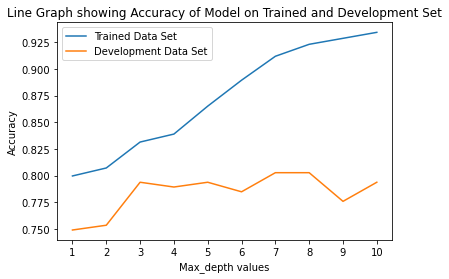

In [104]:
# Creating a line graph to depict accuracy of our 2 models performance

depth = range(1,trained.tree_.max_depth+1)

Train_score = [] 
for d in depth:
  clf = DecisionTreeClassifier(max_depth=d, random_state=42)
  clf.fit(X_train, y_train)
  score = clf.score(X_train, y_train)
  Train_score.append(score)

dev_score = [] 
for d in depth:
  clf = DecisionTreeClassifier(max_depth=d, random_state=42)
  clf.fit(X_train, y_train)
  score = clf.score(X_valid, y_valid)
  dev_score.append(score)

fig, ax = plt.subplots()
ax.plot(depth, Train_score, label='Trained Data Set')
ax.plot(depth, dev_score, label='Development Data Set')
ax.legend(loc='upper left')
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(depth)
plt.title('Line Graph showing Accuracy of Model on Trained and Development Set')
plt.show()

Depth 8 produces the highest Accuracy value for both our Trained data set as well as our Development data set.

The Trained Data set seems to have a uniform logarithmic growth. This shows that as depth increases, there is a steep increase in model performance, until a certain depth value. There after the model continues to increase in accuracy but at a slower rate.

The Development Data Set does not produce a logarithmic or a exponential growth in performance with depth. This indicates to us that the correlation between depth and accuracy for the development data set is closely bound. 

### Producing the Final Decision Tree

I will be using a max depth of 8, as this was seen in the previoous graph to be the best depth for both trained and development sets.

In [114]:
# training a model on the trained set
# Using Max Depth of 8

test = DecisionTreeClassifier(max_depth=8, random_state=42)
test.fit(X_train, y_train)
print("Accuracy:", test.score(X_test, y_test))
print("At depth:", test.tree_.max_depth)

Accuracy: 0.8432835820895522
At depth: 8


On calculating the Accuracy Score of the final Test model, we find that we have achieved a score of 84.43% at depth 8. Looking at the training data and the development data, we can see that at depth 8, our training set had a accuracy score of 92.32% and our development set had a accuracy score of 80.27%. This is inline wih what we are expecting. The reason is test data may have a higher accuracy score than the development data, is due to the fact that the test score only consisted of 15% of the toal data. This can be seen as our model overfitting the test set.  

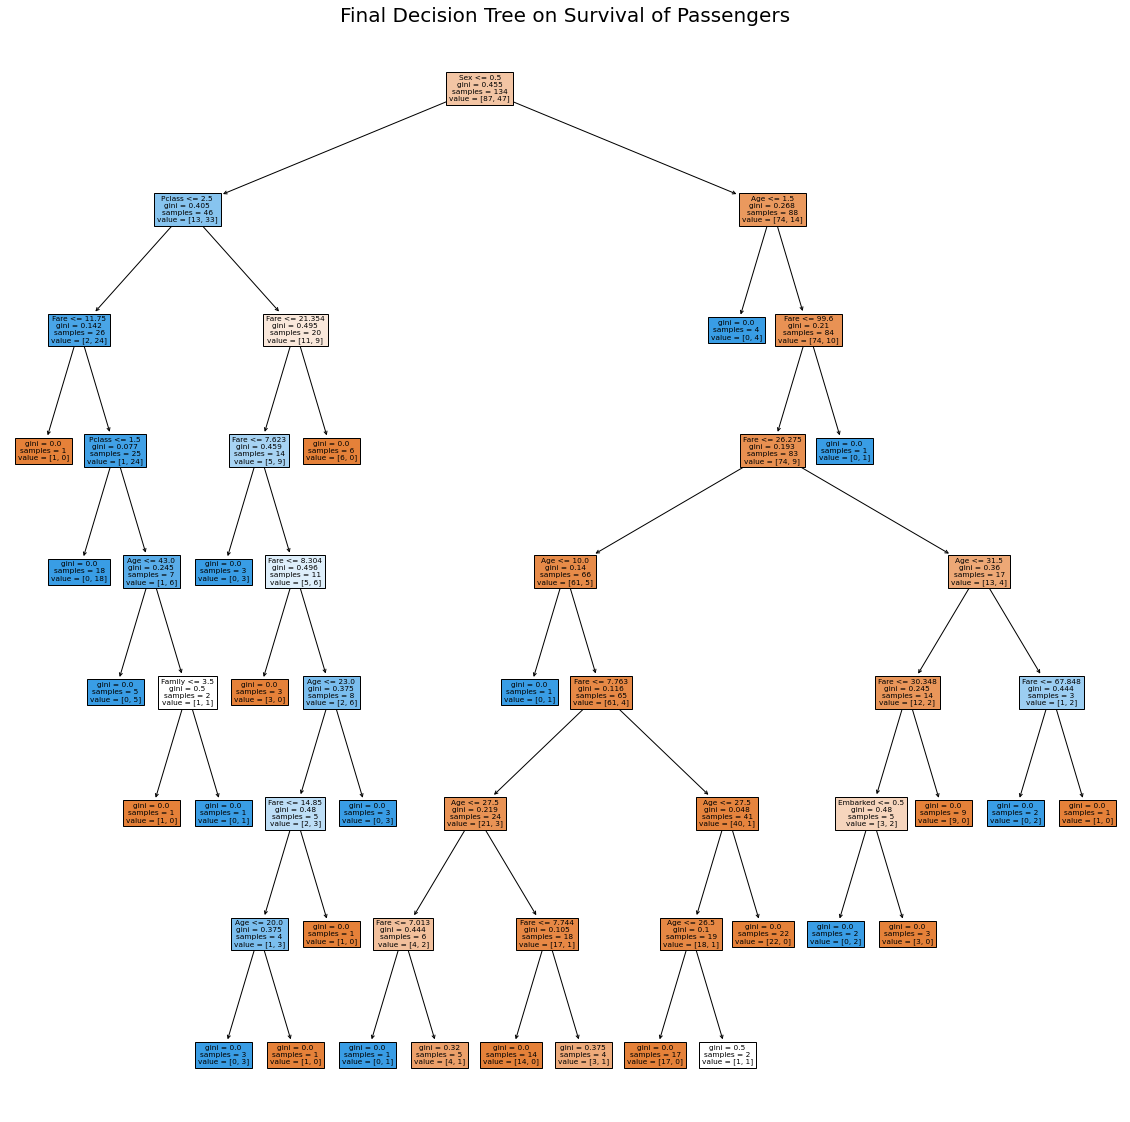

In [116]:
# Create the Decision Tree

fig = plt.figure(figsize=(20,20))
test = DecisionTreeClassifier(max_depth=8, random_state=42)
test.fit(X_test, y_test)
tree.plot_tree(test,feature_names = X.columns, filled=True)
plt.title('Final Decision Tree on Survival of Passengers', fontsize=20)
plt.show()


fig.savefig('titanic_tree.png', format='png', dpi=800)